In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("auto.csv")

In [3]:
df['mpg'].median()

22.75

In [4]:
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x >= df['mpg'].median() else 0)

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,1
388,44.0,4,97.0,52,2130,24.6,82,2,1
389,32.0,4,135.0,84,2295,11.6,82,1,1
390,28.0,4,120.0,79,2625,18.6,82,1,1


In [6]:
df['mpg01'].value_counts()

0    196
1    196
Name: mpg01, dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


<AxesSubplot:>

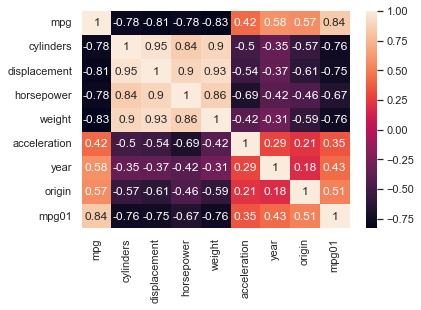

In [37]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


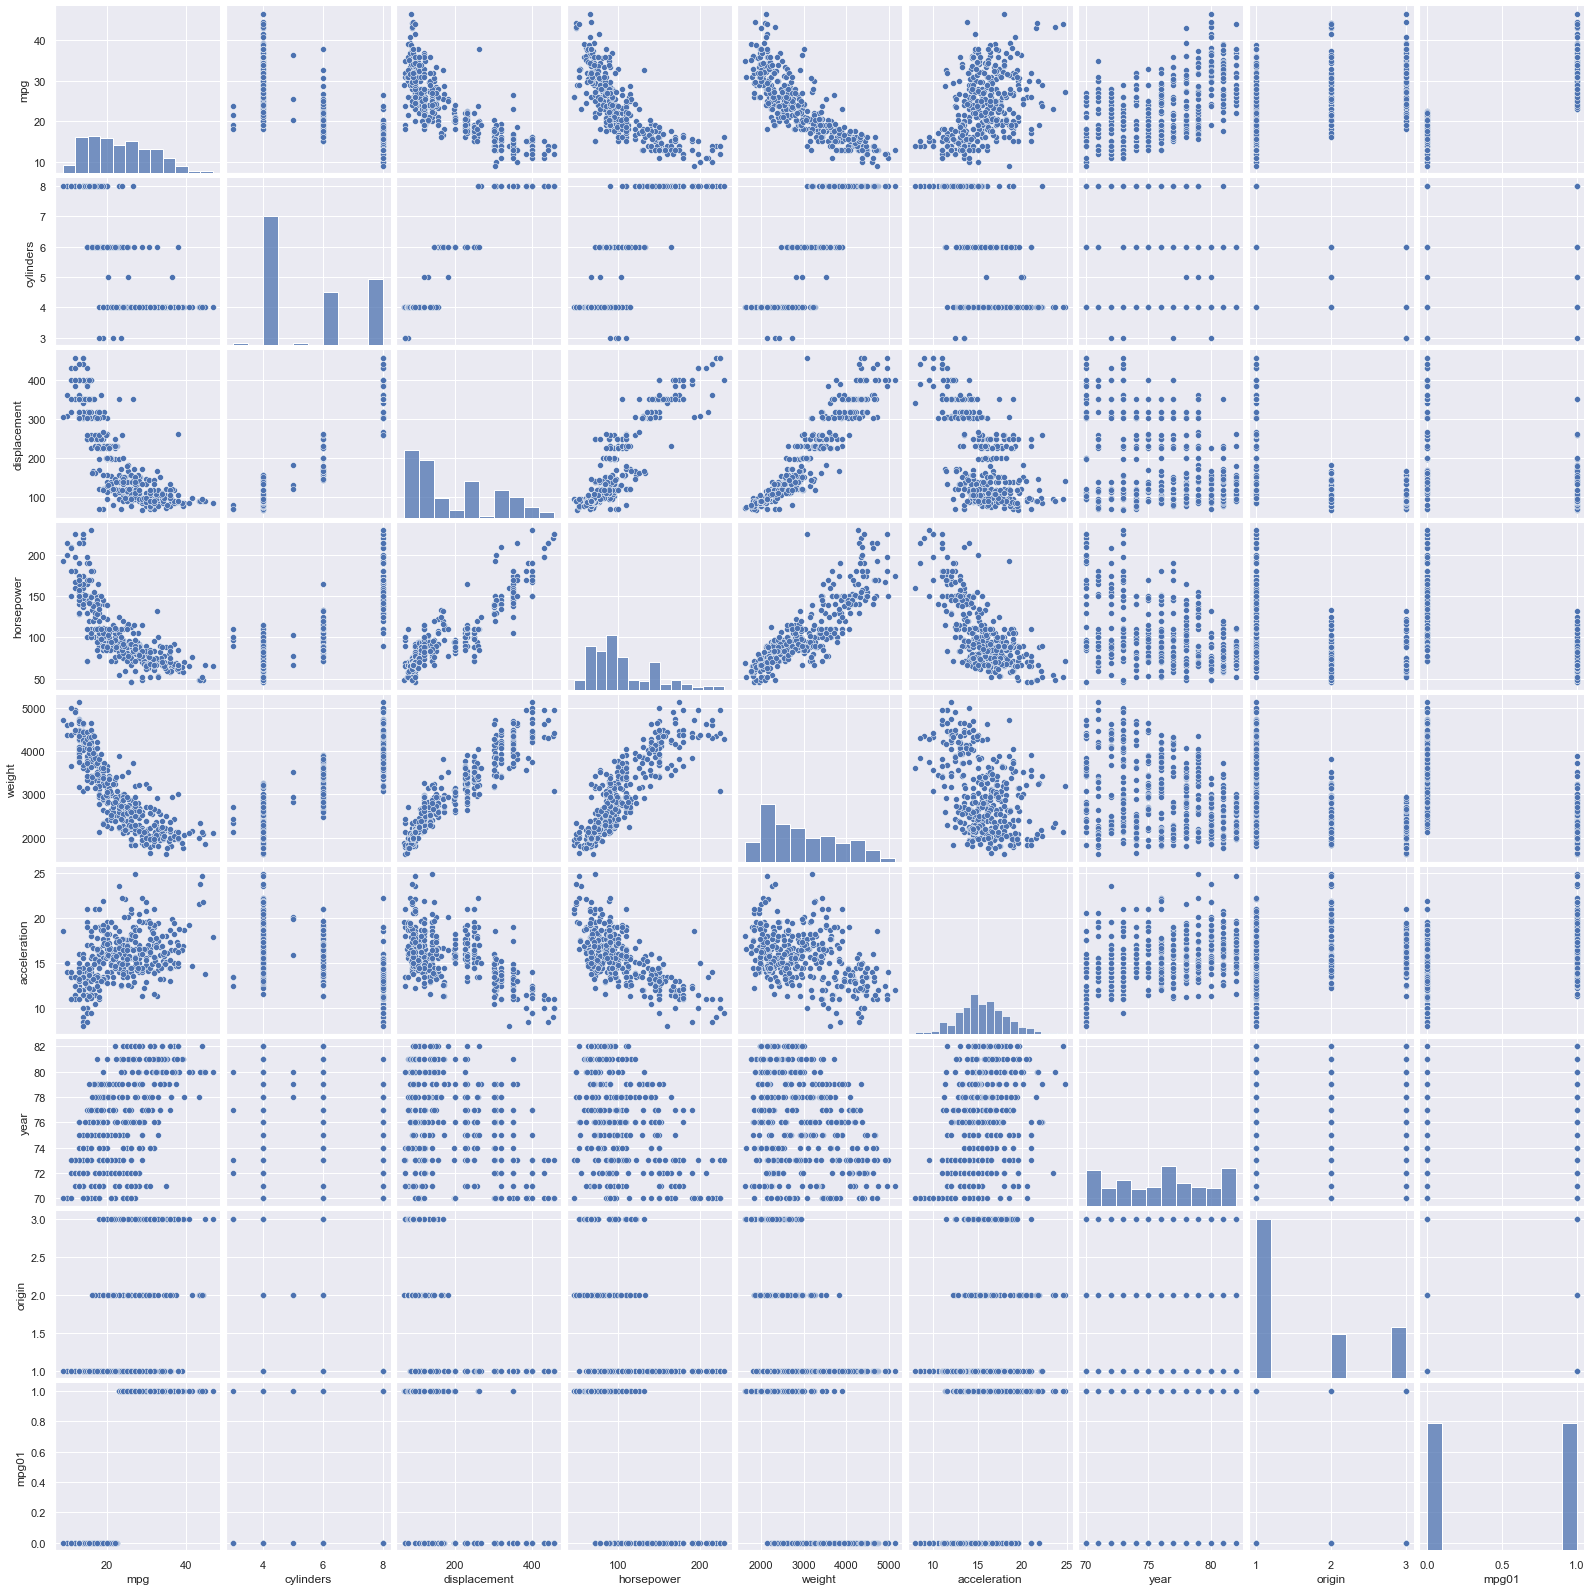

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='mpg01', ylabel='weight'>

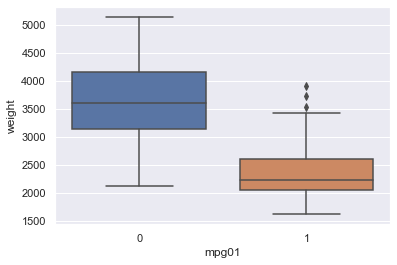

In [41]:
sns.boxplot(df, x='mpg01', y='weight')

<AxesSubplot:xlabel='mpg01', ylabel='horsepower'>

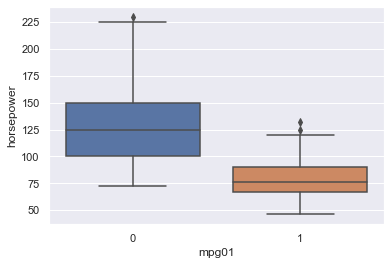

In [42]:
sns.boxplot(df, x='mpg01', y='horsepower')

<AxesSubplot:xlabel='mpg01', ylabel='cylinders'>

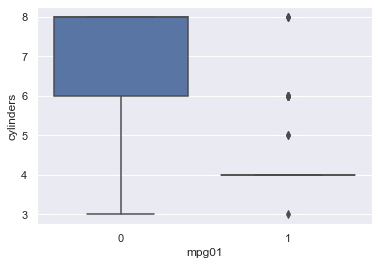

In [43]:
sns.boxplot(df, x='mpg01', y='cylinders')

<AxesSubplot:xlabel='mpg01', ylabel='displacement'>

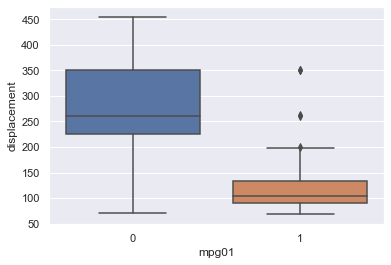

In [44]:
sns.boxplot(df, x='mpg01', y='displacement')

<AxesSubplot:xlabel='mpg01', ylabel='origin'>

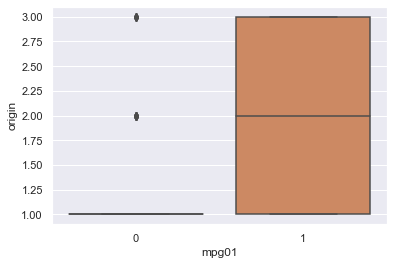

In [45]:
sns.boxplot(df, x='mpg01', y='origin')

In [12]:
#Remove mpg column from dataset
X = df[['cylinders','displacement','horsepower','weight','origin']]
y = df['mpg01']
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7406)

In [13]:
X_train

,cylinders,displacement,horsepower,weight,origin
373,4,98.0,70,2125,1
31,4,113.0,95,2228,3
97,6,250.0,100,3278,1
204,4,140.0,72,2565,1
197,6,225.0,100,3651,1
...,...,...,...,...,...
127,4,79.0,67,1950,3
206,8,318.0,150,3940,1
371,4,91.0,68,1970,3
342,4,97.0,67,2065,3


In [14]:
y_train

373    1
31     1
97     0
204    1
197    0
      ..
127    1
206    0
371    1
342    1
311    1
Name: mpg01, Length: 313, dtype: int64

In [15]:
#LDA
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
print("Test Error: ", 1 - lda_model.score(X_test,y_test))

Test Error:  0.05063291139240511


In [16]:
#QDA
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print("Test Error: ", 1 - qda_model.score(X_test,y_test))

Test Error:  0.06329113924050633


In [17]:
#NaiveBayes
nb_model = GaussianNB().fit(X_train, y_train)
print("Test Error: ", 1 - nb_model.score(X_test,y_test))

Test Error:  0.05063291139240511


In [19]:
#LogisticRegression
lr_model = LogisticRegression().fit(X_train, y_train)
print("Test Error: ", 1 - lr_model.score(X_test,y_test))

Test Error:  0.12658227848101267


/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#KNN
train_errors = []
for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_errors.append(1 - knn_model.score(X_train,y_train))
train_errors

#Use model k=3
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print("Test Error: ", 1 - knn_model.score(X_test,y_test))

Test Error:  0.08860759493670889


/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which th

<AxesSubplot:xlabel='k', ylabel='error'>

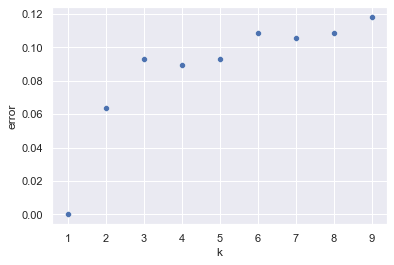

In [30]:
knn_train_df = pd.DataFrame({"k":range(1,10), "error":train_errors})
sns.scatterplot(knn_train_df, x="k", y="error")

In [33]:
B = 100 #total loop times
all_test_errors = []

for b in range(B):
    test_errors = []
    #Split train and test dataset based on random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=b)
    
    #1. Train LDA
    lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
    test_errors.append(1 - lda_model.score(X_test,y_test))
    
    #2. Train QDA
    qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
    test_errors.append(1 - qda_model.score(X_test,y_test))
    
    #3. Train NaiveBayes
    nb_model = GaussianNB().fit(X_train, y_train)
    test_errors.append(1 - nb_model.score(X_test,y_test))
    
    #4. Train logistic regression
    lr_model = LogisticRegression().fit(X_train, y_train)
    test_errors.append(1 - lr_model.score(X_test,y_test))
    
    #5. Train KNN(k=3)
    knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    test_errors.append(1 - knn_model.score(X_test,y_test))
    
    all_test_errors.append(test_errors)

all_test_errors

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/mercari-ml-omakase-us/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

[[0.1392405063291139,
  0.15189873417721522,
  0.12658227848101267,
  0.15189873417721522,
  0.10126582278481011],
 [0.06329113924050633,
  0.05063291139240511,
  0.06329113924050633,
  0.15189873417721522,
  0.10126582278481011],
 [0.11392405063291144,
  0.12658227848101267,
  0.11392405063291144,
  0.1392405063291139,
  0.1392405063291139],
 [0.07594936708860756,
  0.08860759493670889,
  0.07594936708860756,
  0.07594936708860756,
  0.10126582278481011],
 [0.06329113924050633,
  0.08860759493670889,
  0.07594936708860756,
  0.10126582278481011,
  0.08860759493670889],
 [0.08860759493670889,
  0.12658227848101267,
  0.08860759493670889,
  0.10126582278481011,
  0.10126582278481011],
 [0.15189873417721522,
  0.10126582278481011,
  0.10126582278481011,
  0.15189873417721522,
  0.12658227848101267],
 [0.10126582278481011,
  0.10126582278481011,
  0.08860759493670889,
  0.10126582278481011,
  0.1392405063291139],
 [0.11392405063291144,
  0.1392405063291139,
  0.11392405063291144,
  0.1265

In [34]:
all_test_errors = np.array(all_test_errors)
index_names = ['LDA','QDA','NB','LR','KNN']
all_test_err_df = pd.DataFrame({'Mean':np.mean(all_test_errors,axis=0),
                                'Variance':np.var(all_test_errors, axis=0)},
                               index=index_names)
all_test_err_df

,Mean,Variance
LDA,0.103165,0.000956
QDA,0.104937,0.001222
NB,0.099114,0.001054
LR,0.124810,0.001599
KNN,0.120127,0.001171


<AxesSubplot:title={'center':'Mean Error vs. Model'}>

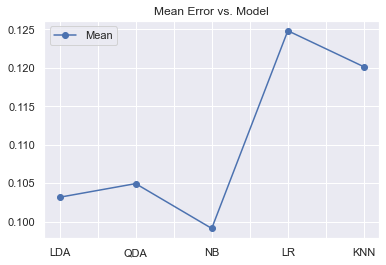

In [35]:
all_test_err_df.plot.line(y='Mean',title='Mean Error vs. Model', marker='o')

<AxesSubplot:title={'center':'Error Variance vs. Model'}>

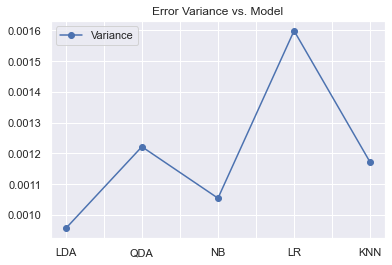

In [36]:
all_test_err_df.plot.line(y='Variance',title='Error Variance vs. Model', marker='o')